In [1]:
from HeaderP import *

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [3]:
import pynbody
import pylab
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import os, pickle

In [278]:
data=pd.read_pickle('./Data/Buck_g7_55e11.pkl')

In [184]:
#data=pd.read_pickle('./Data/g7.08e11_abundance_position.dat')

In [185]:
#data=pd.DataFrame.from_dict(data)

In [186]:
#data.to_pickle('./Data/Buck_g7_08e11.pkl')

add in actions and velocities

In [279]:
actions=pd.read_pickle('./Data/7.55e11.01024_actions.dat')

In [280]:
actions3=pd.DataFrame(np.array((actions['actions'])),columns=['Jr','Jphi','Jz'])

In [281]:
velocities=pd.DataFrame(np.array((actions['vel'])),columns=['vx','vy','vz'])
positions=pd.DataFrame(np.array((actions['pos'])),columns=['x','y','z'])

In [282]:
actions=pd.concat([pd.DataFrame(np.array((actions['iord'])),columns=['iord']),velocities,positions,actions3], axis=1)

In [283]:
data=pd.merge(data,actions,left_on='iords',right_on='iord',how='inner')

In [284]:
data.to_pickle('./Data/Buck_g7_55e11.pkl')

In [98]:
data['R']=np.sqrt(data['x']**2+data['y']**2)

get rid of outliers

In [70]:
import random
data=data.loc[abs(data['z'])<10].reset_index(drop=True)
data=data.loc[abs(data['R'])<30].reset_index(drop=True)
ids=list(range(len(data)))
random.shuffle(ids)
pick=ids[:300000]


In [99]:
data['R_bir']=np.sqrt(data['x_birth']**2+data['y_birth']**2)

In [100]:
#data.to_pickle('./Data/Buck_g2_79e12.pkl')

In [444]:
simNo='2_79e12'

In [445]:
#data=pd.read_pickle('Data/Buck_g'+simNo+'.pkl')
#data=pd.read_pickle('../SecondYear/CannonDR16_cut.pkl')
#select=pd.read_pickle('Data/Buck_g'+simNo+'_apogee_selec.pkl')
#data=pd.merge(data,select[['iords','ofe_scale','feh_scale']],left_on='iords',right_on='iords')
#data.to_pickle('Data/Buck_g'+simNo+'_apogee_selec.pkl')

In [446]:
data=pd.read_pickle('Data/Buck_g'+simNo+'_apogee_selec.pkl')
data['R_bir']=np.sqrt((data['x_birth'])**2+data['y_birth']**2)
data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
scale_fe=0.250019907951355/np.std(data['feh'])
scale_o=0.10861970484256744/np.std(data['ofe'])
data['feh_scale']=data['feh']*scale_fe-0.0906638577580452-np.mean(data['feh'])
data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-np.mean(data['ofe'])

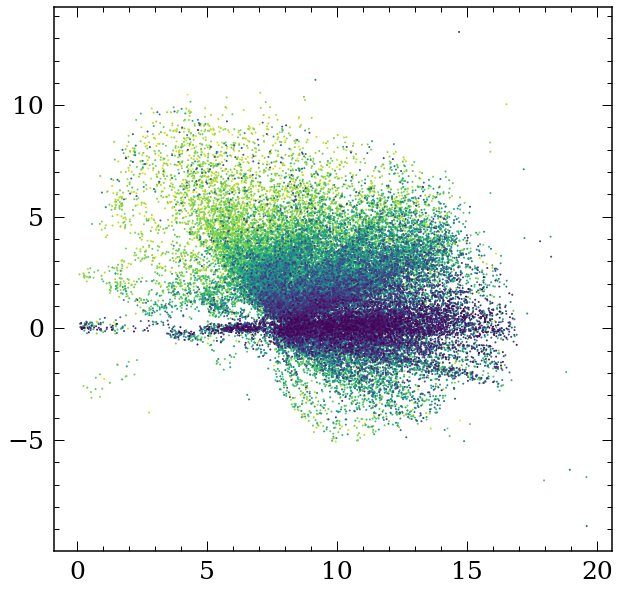

In [447]:
data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
plt.scatter(data['R'],data['z_today'],c=data['age'],s=1)
#plt.xlim([-0.8,0.3])
#plt.ylim([-0.1,0.4])

(-0.2, 0.4)

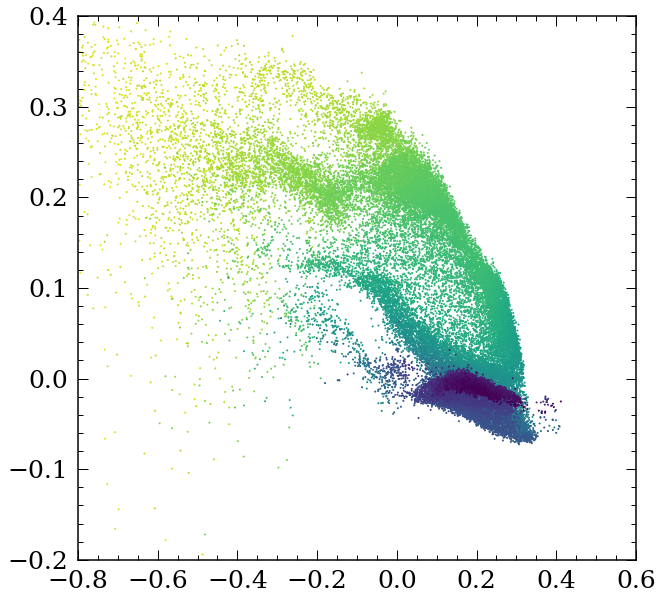

In [448]:
plt.scatter(data['feh_scale'],data['ofe_scale'],c=data['age'],s=1)
plt.xlim([-0.8,0.6])
plt.ylim([-0.2,0.4])

In [449]:
def getave_age(age,feh,jz=False,jzs=[]):
    Nbin=50
    febins=np.linspace(-0.8,0.5,Nbin)
    
    meanage=np.zeros(Nbin-1)
    meanage_err=np.zeros(Nbin-1)
    meanfeh=np.zeros(Nbin-1)
    starnumb=np.zeros(Nbin-1)
    if jz==True:
        meanjz=np.zeros(Nbin-1)
    for i in trange(Nbin-1):
        binlow=febins[i]
        binhi=febins[i+1]
        #print(binlow,binhi)

        m=(feh>=binlow)&(feh<=binhi)
        
        if sum(m)==0:
            continue
        meanfeh[i]=(binlow+binhi)/2
        #print(sum(m))
        if jz==True:
            meanjz[i]=np.median(jzs[m])
        meanage[i]=np.mean(age[m])
        meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
        starnumb[i]=sum(m)
    if jz==True:
        return meanfeh,meanage,meanage_err,meanjz,starnumb
    else:
        return meanfeh,meanage,meanage_err,starnumb

100%|██████████| 49/49 [00:00<00:00, 894.08it/s]


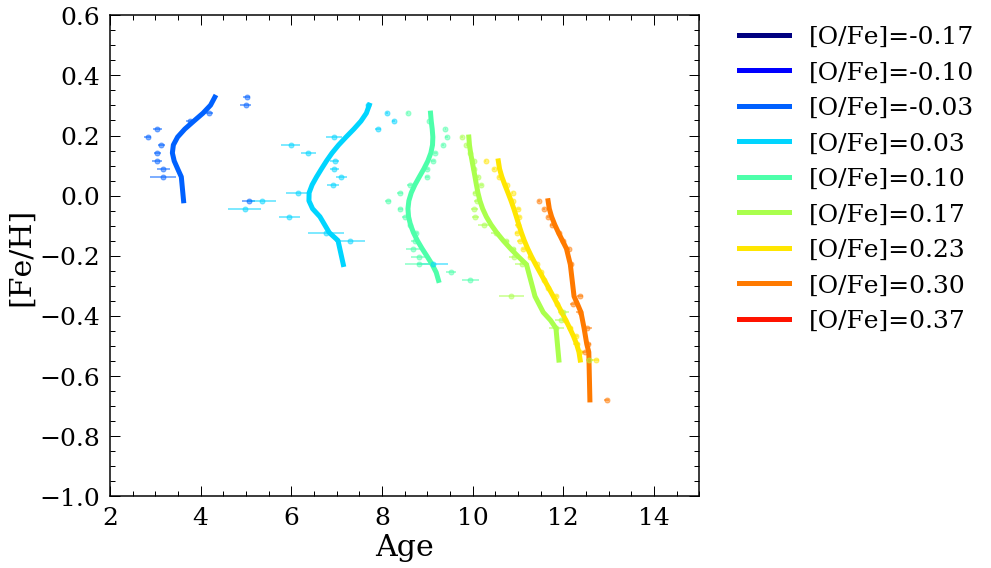

In [450]:
import matplotlib
Rbin=np.linspace(-0.2,0.4,10)
cmap = plt.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=min(Rbin), vmax=max(Rbin))
colors_p=[cmap(norm(i)) for i in Rbin]

plt.figure(figsize=(14,8))

for i in range(len(Rbin)-1):
    df_all=data.loc[data['ofe_scale']>Rbin[i]]
    df_all=df_all.loc[df_all['ofe_scale']<Rbin[i+1]]
        
        
    df_all_z=df_all.loc[abs(df_all['R']-8)<1].dropna(subset=['feh_scale','age'])
        
    meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                           jz=True,jzs=df_all_z['Jz'])
        
    m=(meanfeh!=0)&(starnumb>10)
    meanfeh,meanage,meanage_err,meanjz,starnumb=meanfeh[m],meanage[m],meanage_err[m],meanjz[m],starnumb[m]
        
    im=plt.errorbar(meanage,meanfeh,xerr=meanage_err,alpha=0.5,color=colors_p[i],fmt='o',markersize=5)
    #im=plt.scatter(meanage,meanfeh,alpha=0.5,color=colors_p[i],s=meanjz)
    
    filterage=gaussian_filter(meanage, sigma=3)
    plt.plot(filterage,meanfeh,linewidth=5,color=colors_p[i],label='[O/Fe]=%.2f'%(Rbin[i]/2.+Rbin[i+1]/2.))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Age')
    plt.ylabel('[Fe/H]')
 
    plt.xlim([2,15])
    plt.ylim([-1,0.6])

#cb=plt.colorbar(im)
#cb.set_label('[α/Fe]')
plt.tight_layout()  

plt.savefig('FeAge_inAlpha_'+simNo+'.png')

100%|██████████| 49/49 [00:00<00:00, 577.80it/s]


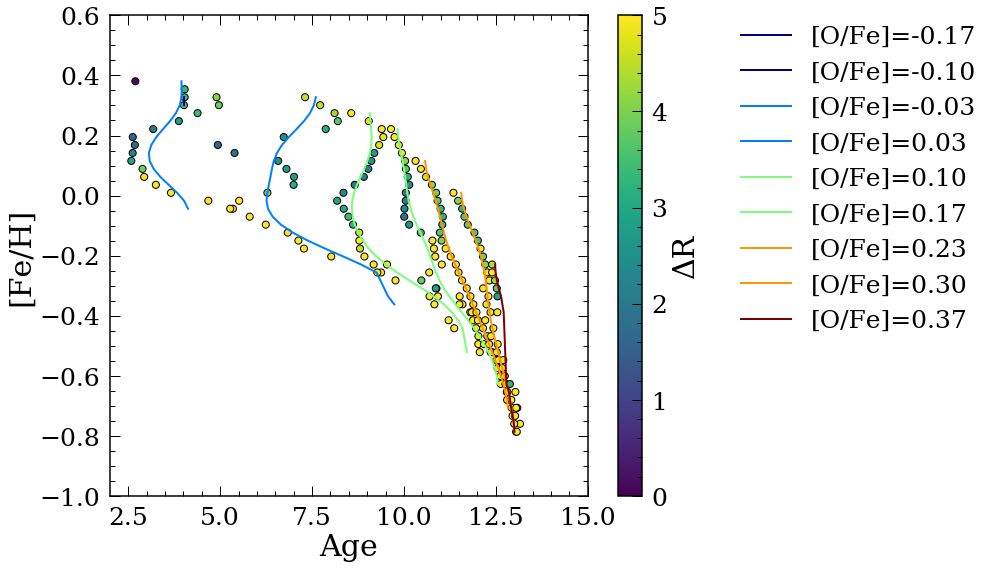

In [451]:
import matplotlib
Rbin=np.linspace(-0.2,0.4,10)
cmap = plt.cm.get_cmap('jet',5)
norm = matplotlib.colors.Normalize(vmin=min(Rbin), vmax=max(Rbin))
colors_p=[cmap(norm(i)) for i in Rbin]

plt.figure(figsize=(14,8))

for i in range(len(Rbin)-1):
    df_all=data.loc[data['ofe_scale']>Rbin[i]]
    df_all=df_all.loc[df_all['ofe_scale']<Rbin[i+1]]
        
    df_all=df_all.dropna(subset=['R_bir','R'])
    meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all['age'],df_all['feh_scale'],
                                                           jz=True,jzs=abs(df_all['R_bir']-df_all['R']))
        
    m=(meanfeh!=0)&(starnumb>10)
    meanfeh,meanage,meanage_err,meanjz,starnumb=meanfeh[m],meanage[m],meanage_err[m],meanjz[m],starnumb[m]
        
    #im=plt.errorbar(meanage,meanfeh,xerr=meanage_err,alpha=0.5,color=colors_p[i],fmt='o',markersize=5)
    im=plt.scatter(meanage,meanfeh,c=meanjz,s=50,vmin=0,vmax=5,edgecolor='k')
    #im=plt.scatter(meanage,meanfeh,alpha=0.5,color=colors_p[i],s=meanjz)
    
    filterage=gaussian_filter(meanage, sigma=3)
    plt.plot(filterage,meanfeh,linewidth=2,color=colors_p[i],label='[O/Fe]=%.2f'%(Rbin[i]/2.+Rbin[i+1]/2.))
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Age')
    plt.ylabel('[Fe/H]')
 
    plt.xlim([2,15])
    plt.ylim([-1,0.6])

cb=plt.colorbar(im)
cb.set_label('ΔR')
plt.tight_layout()  

plt.savefig('FeAge_inAlpha_'+simNo+'_dr.png')

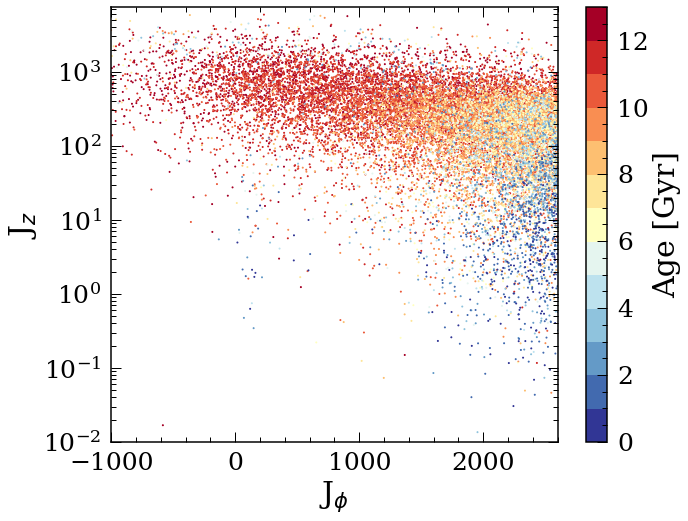

In [452]:
plt.figure(figsize=(10,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)
plt.scatter(data['Jz']+100,data['Jphi'],c=data['age'],s=1, vmin=0,vmax=13,cmap=cmap1)
#plt.xlim([-4000,1000])
plt.xlabel('J$_ϕ$')
plt.ylabel('J$_z$')
plt.yscale('log')
plt.ylim([0.01,7500])
plt.xlim([-1000,2600])
cb=plt.colorbar()
cb.set_label('Age [Gyr]')
plt.savefig('all_action_'+simNo+'.png')

100%|██████████| 9/9 [00:00<00:00, 88.05it/s]


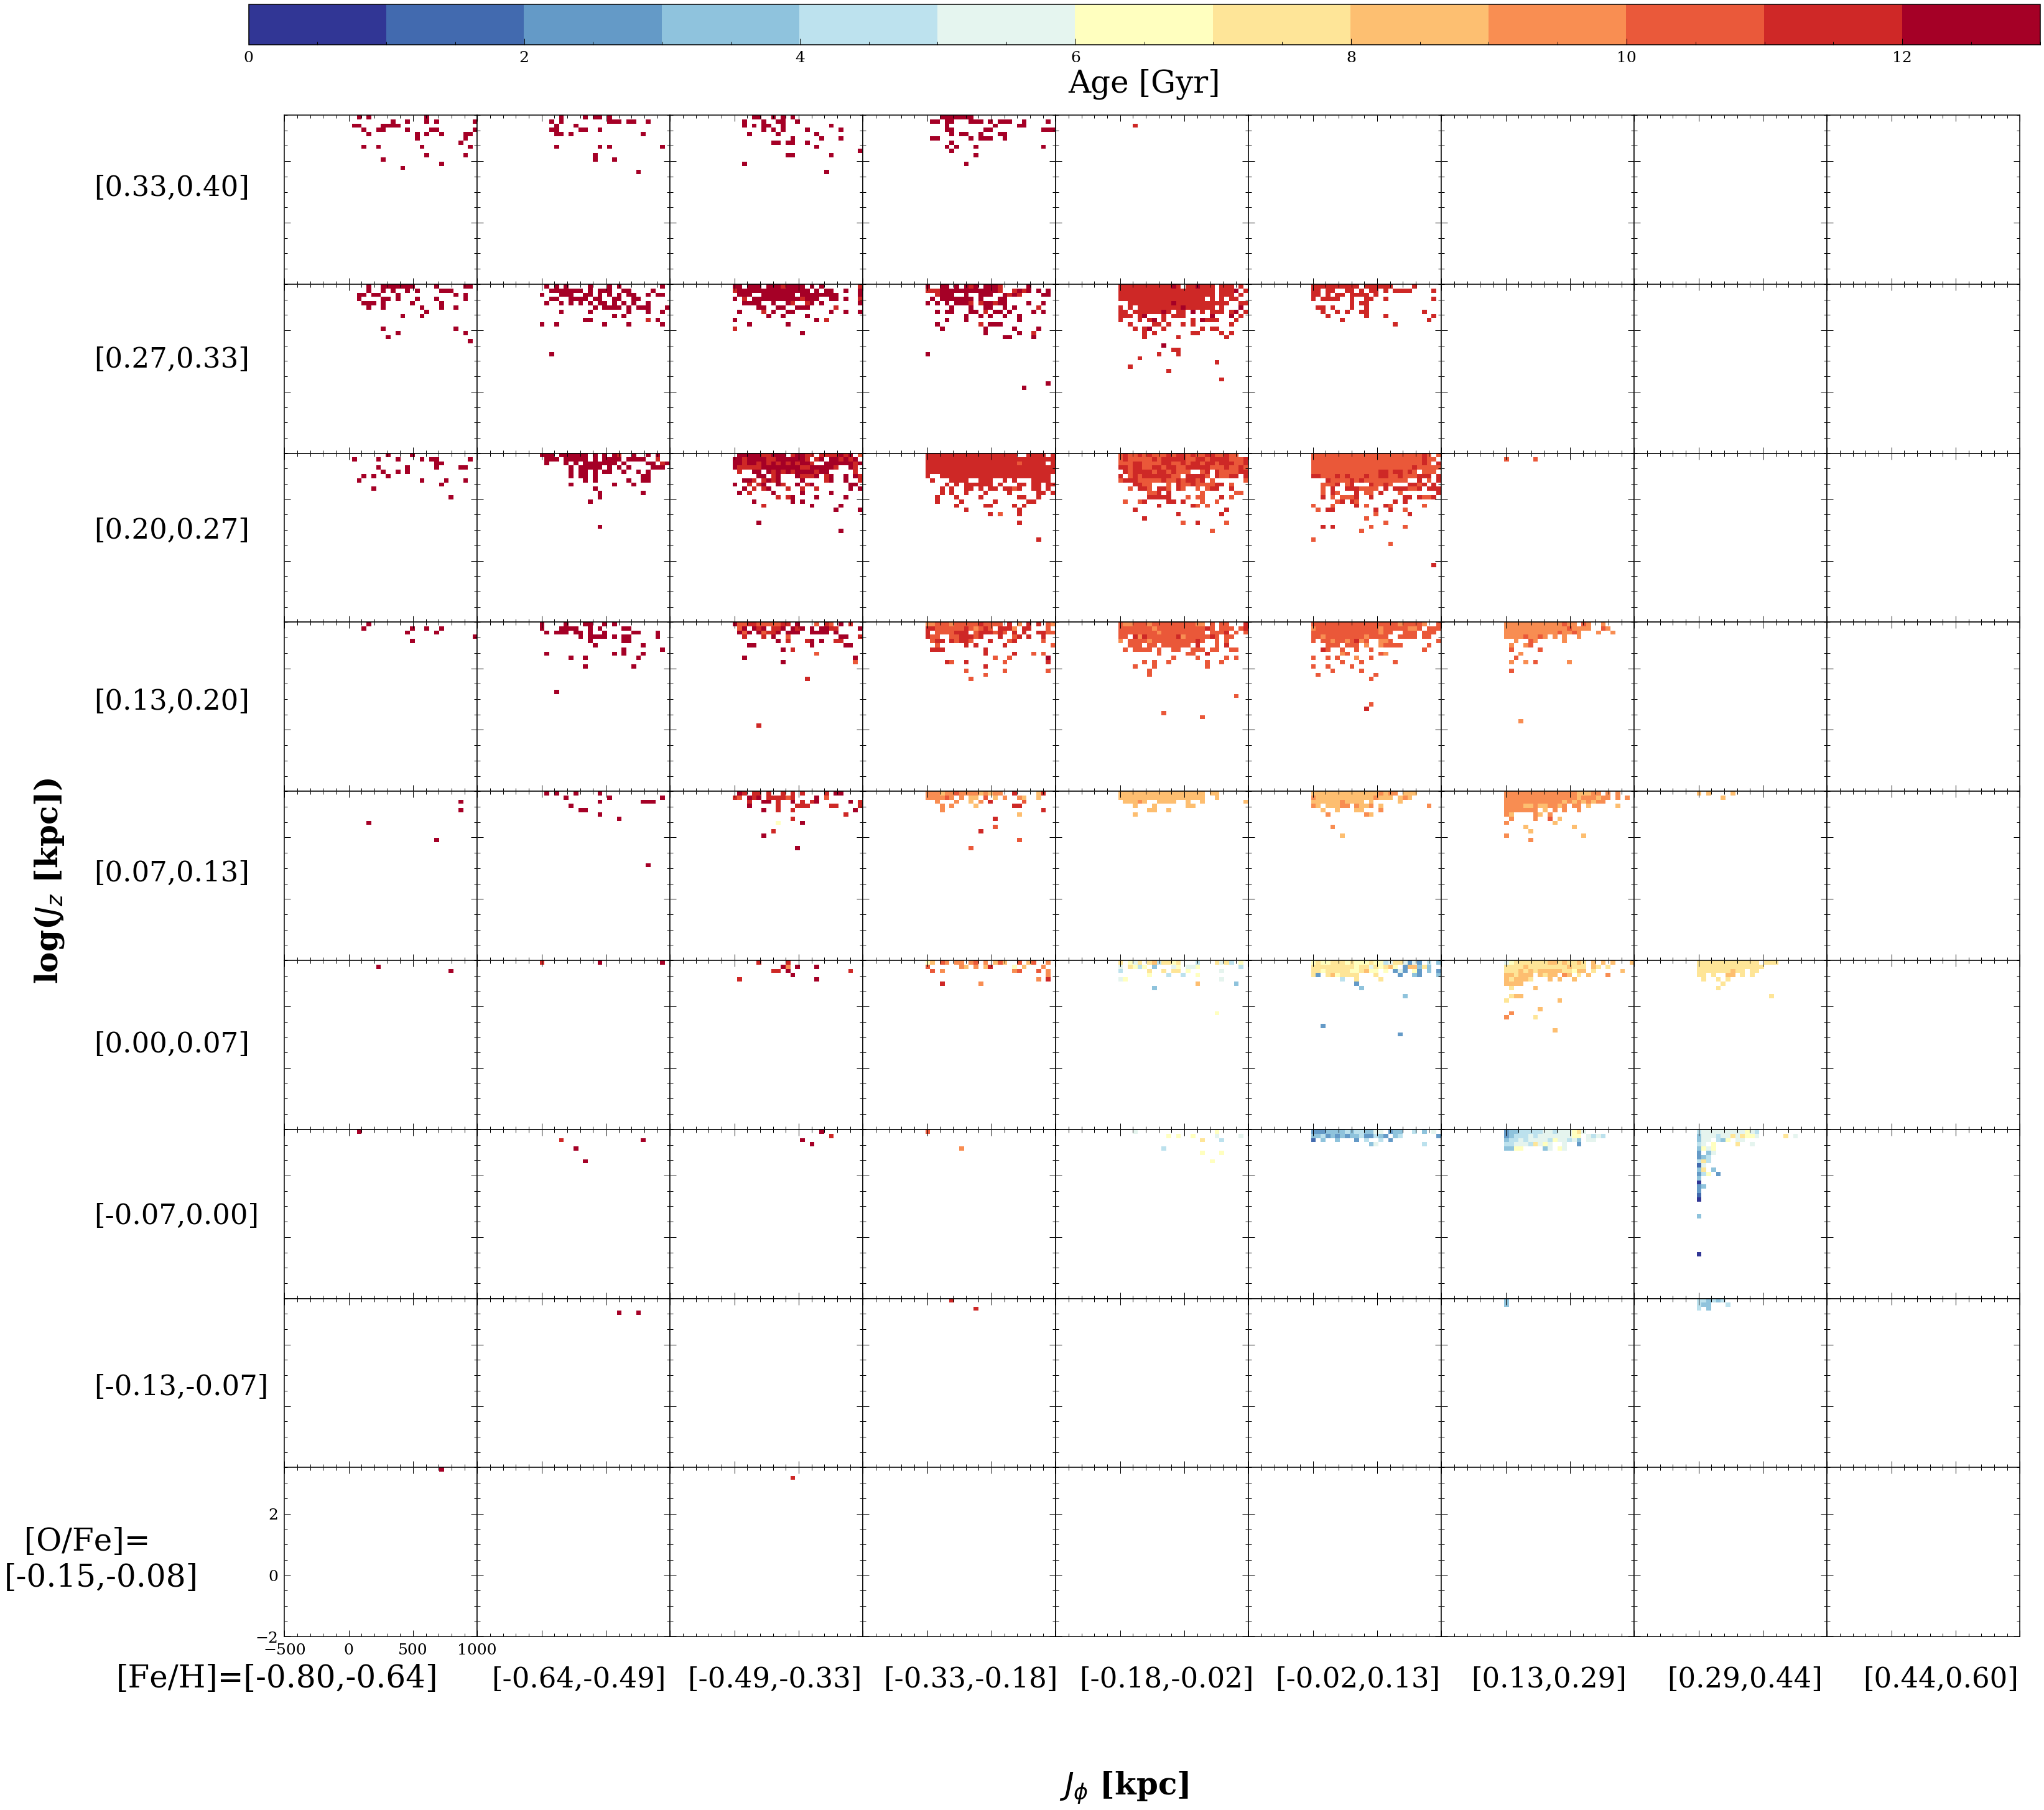

In [453]:
from scipy.ndimage import gaussian_filter

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.6,10)
alpha=np.linspace(0.4,-0.2,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = -500,1000,-2,3.5
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=data.loc[data['ofe_scale']>alpha[i+1]]
    df_all=df_all.loc[df_all['ofe_scale']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_scale'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_scale'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['Jphi'].values,np.log10(df_all_z['Jz'].values),
                df_all_z['age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        count=count+1
        if i!=len(alpha)-2 or j!=0:
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)
        

cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'log($J_z$ [kpc])', ha='center', va='center', rotation='vertical',fontsize=50, fontweight='bold')
fig.text(0.5, 0.05, '$J_ϕ$ [kpc]', ha='center', va='center', rotation='horizontal',fontsize=50, fontweight='bold')

i=0
fig.text(0, 0.15, '  [O/Fe]=\n[%.2f,%.2f]'%(0.3-alpha[i]-0.05,0.3-alpha[i+1]-0.05), rotation='horizontal',
             fontsize=50)
fig.text(0.05, 0.1, '[Fe/H]=[%.2f,%.2f]'%(Febin[i],Febin[i+1]), rotation='horizontal',
             fontsize=50)
    
for i in range(1,10-1):
    fig.text(0.04, 0.16+0.085*i, '[%.2f,%.2f]'%(max(alpha)-alpha[i]+min(alpha),max(alpha)-alpha[i+1]+min(alpha)), rotation='horizontal',
             fontsize=45)
    fig.text(0.13+0.0875*i, 0.1, '[%.2f,%.2f]'%(Febin[i],Febin[i+1]), rotation='horizontal',
             fontsize=45)


plt.savefig('action_sim_'+simNo+'.png')



100%|██████████| 9/9 [00:00<00:00, 74.45it/s]


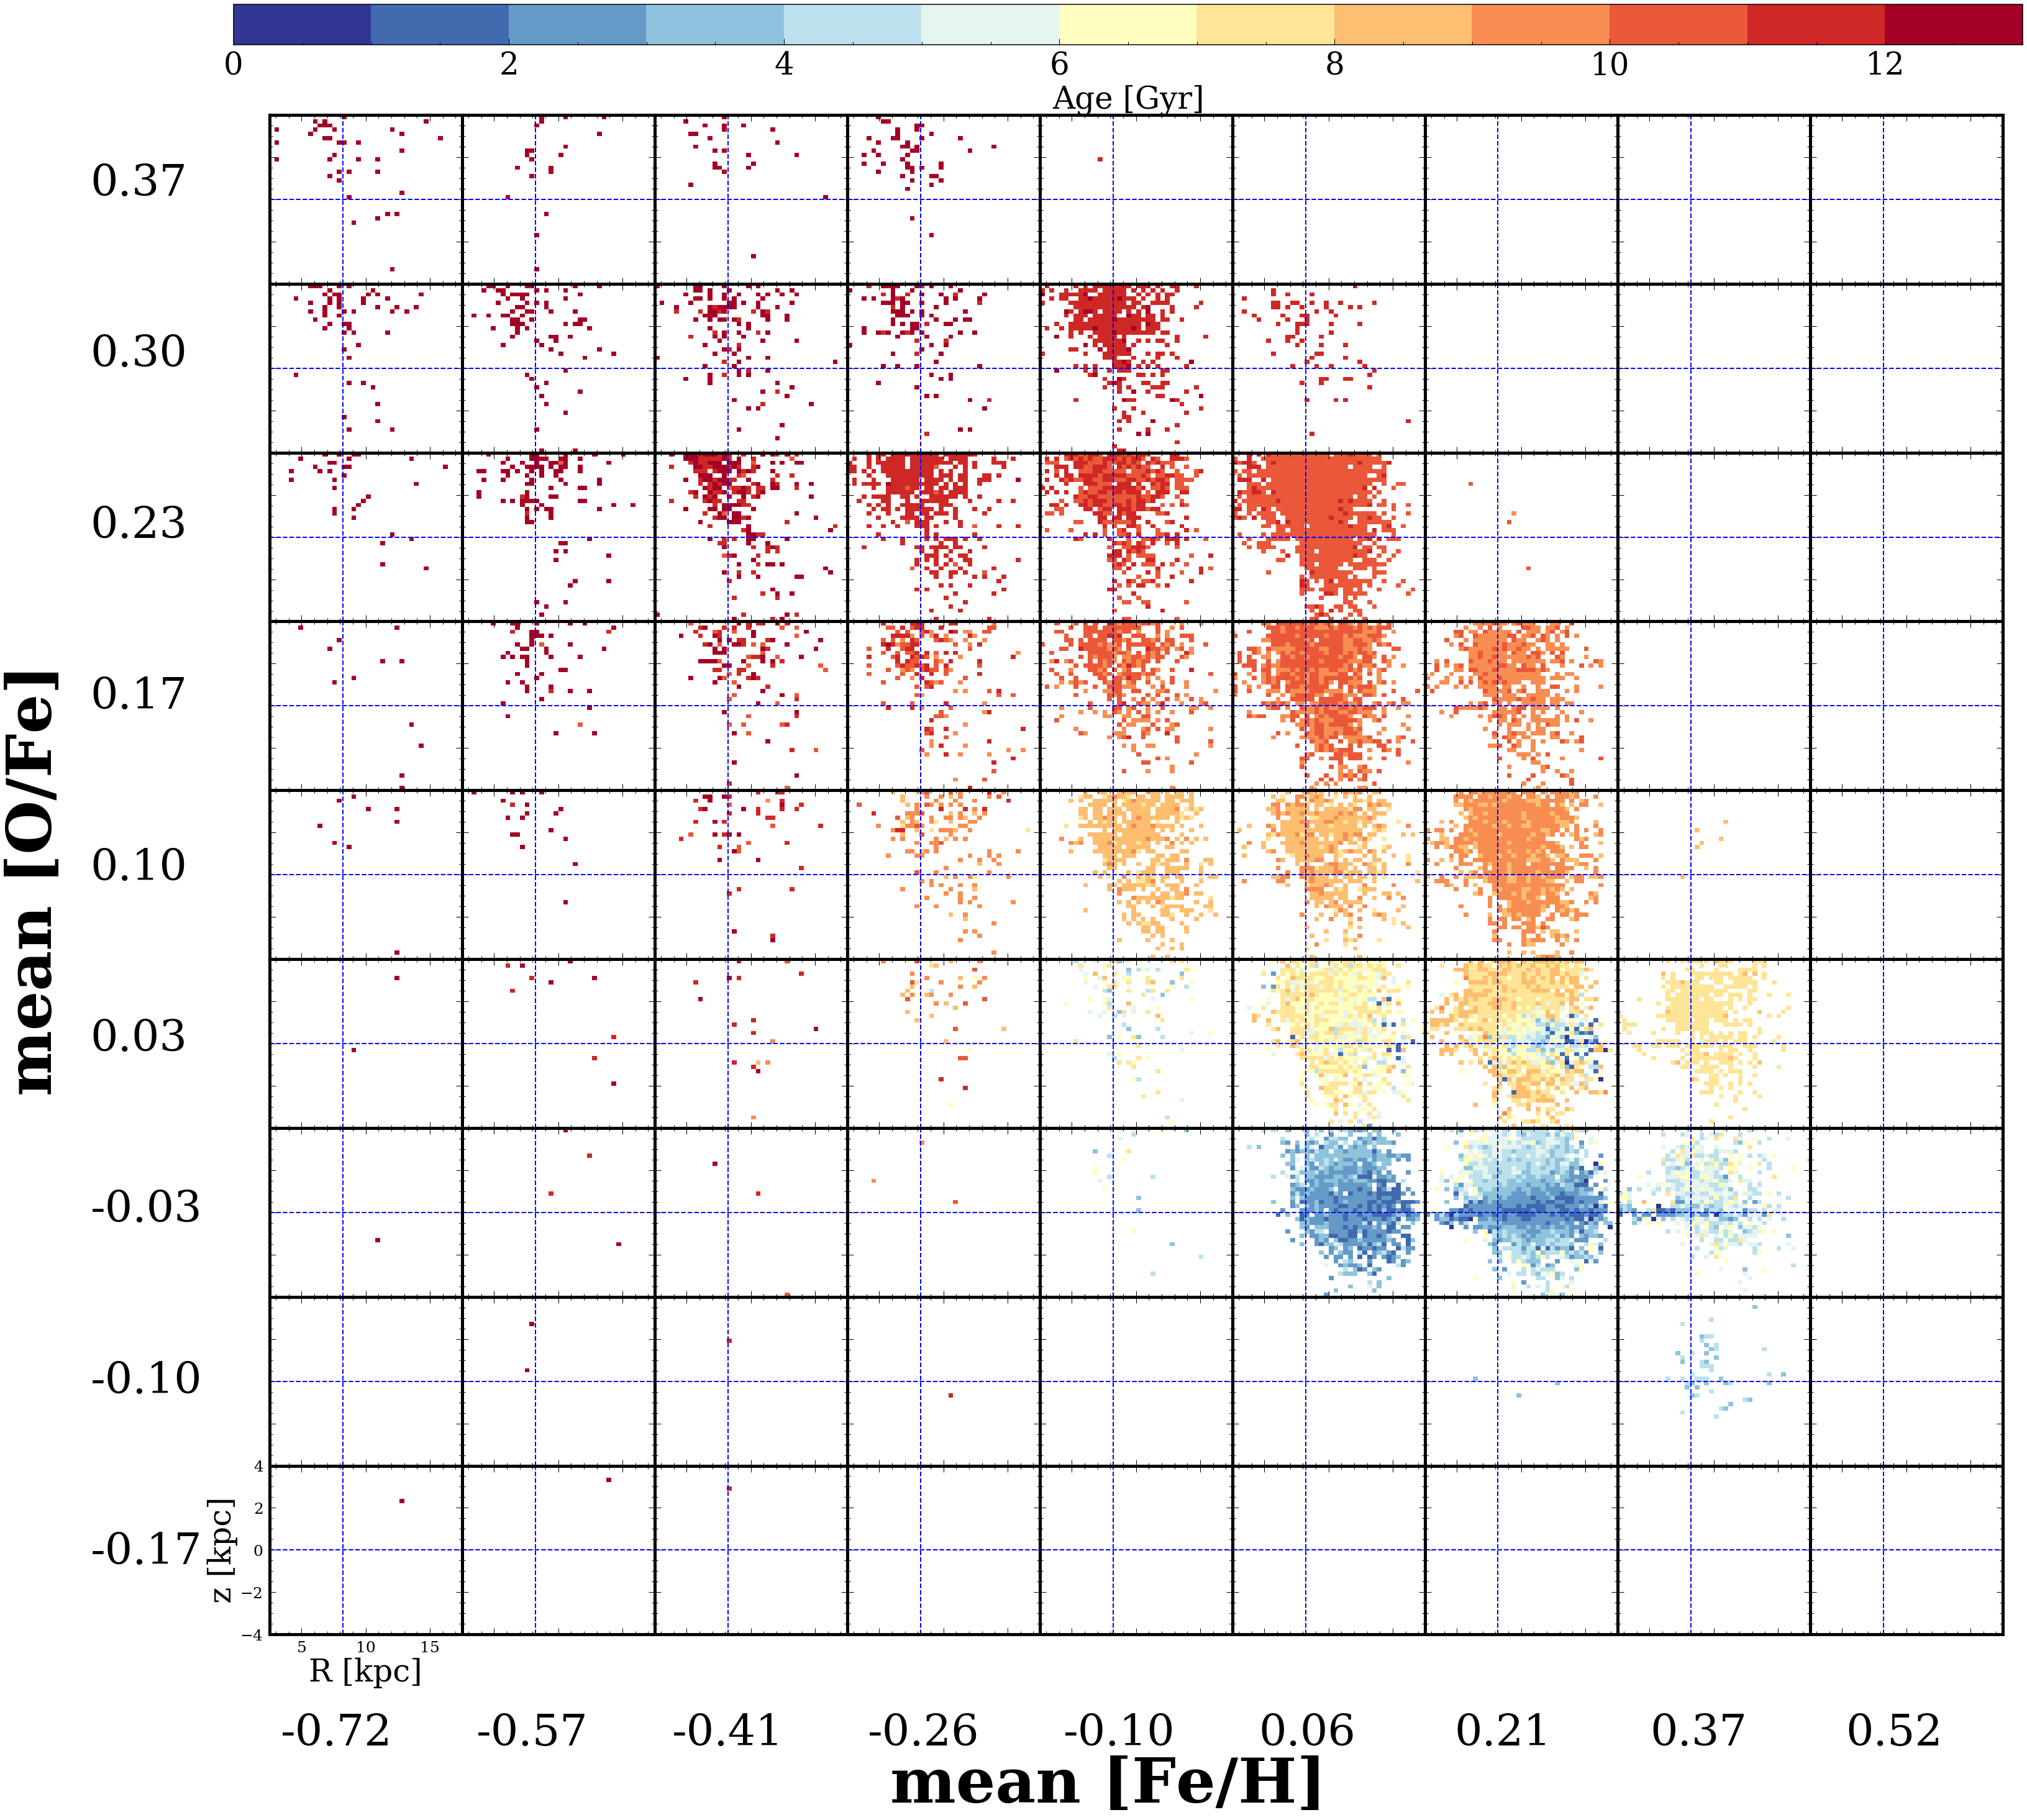

In [454]:
from scipy.ndimage import gaussian_filter

Febin=np.linspace(-0.8,0.6,10)
alpha=np.linspace(0.4,-0.2,10)

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=data.loc[data['ofe_scale']>alpha[i+1]]
    df_all=df_all.loc[df_all['ofe_scale']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_scale'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_scale'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
        
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
      
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if i!=len(alpha)-2 or j!=0:
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
        
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        if i==len(alpha)-2 and j==0:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [O/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((max(alpha)-alpha[i]+min(alpha)+max(alpha)-alpha[i+1]+min(alpha))/2), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


plt.savefig('monofealpha_sim_'+simNo+'.png')




100%|██████████| 9/9 [00:00<00:00, 66.69it/s]


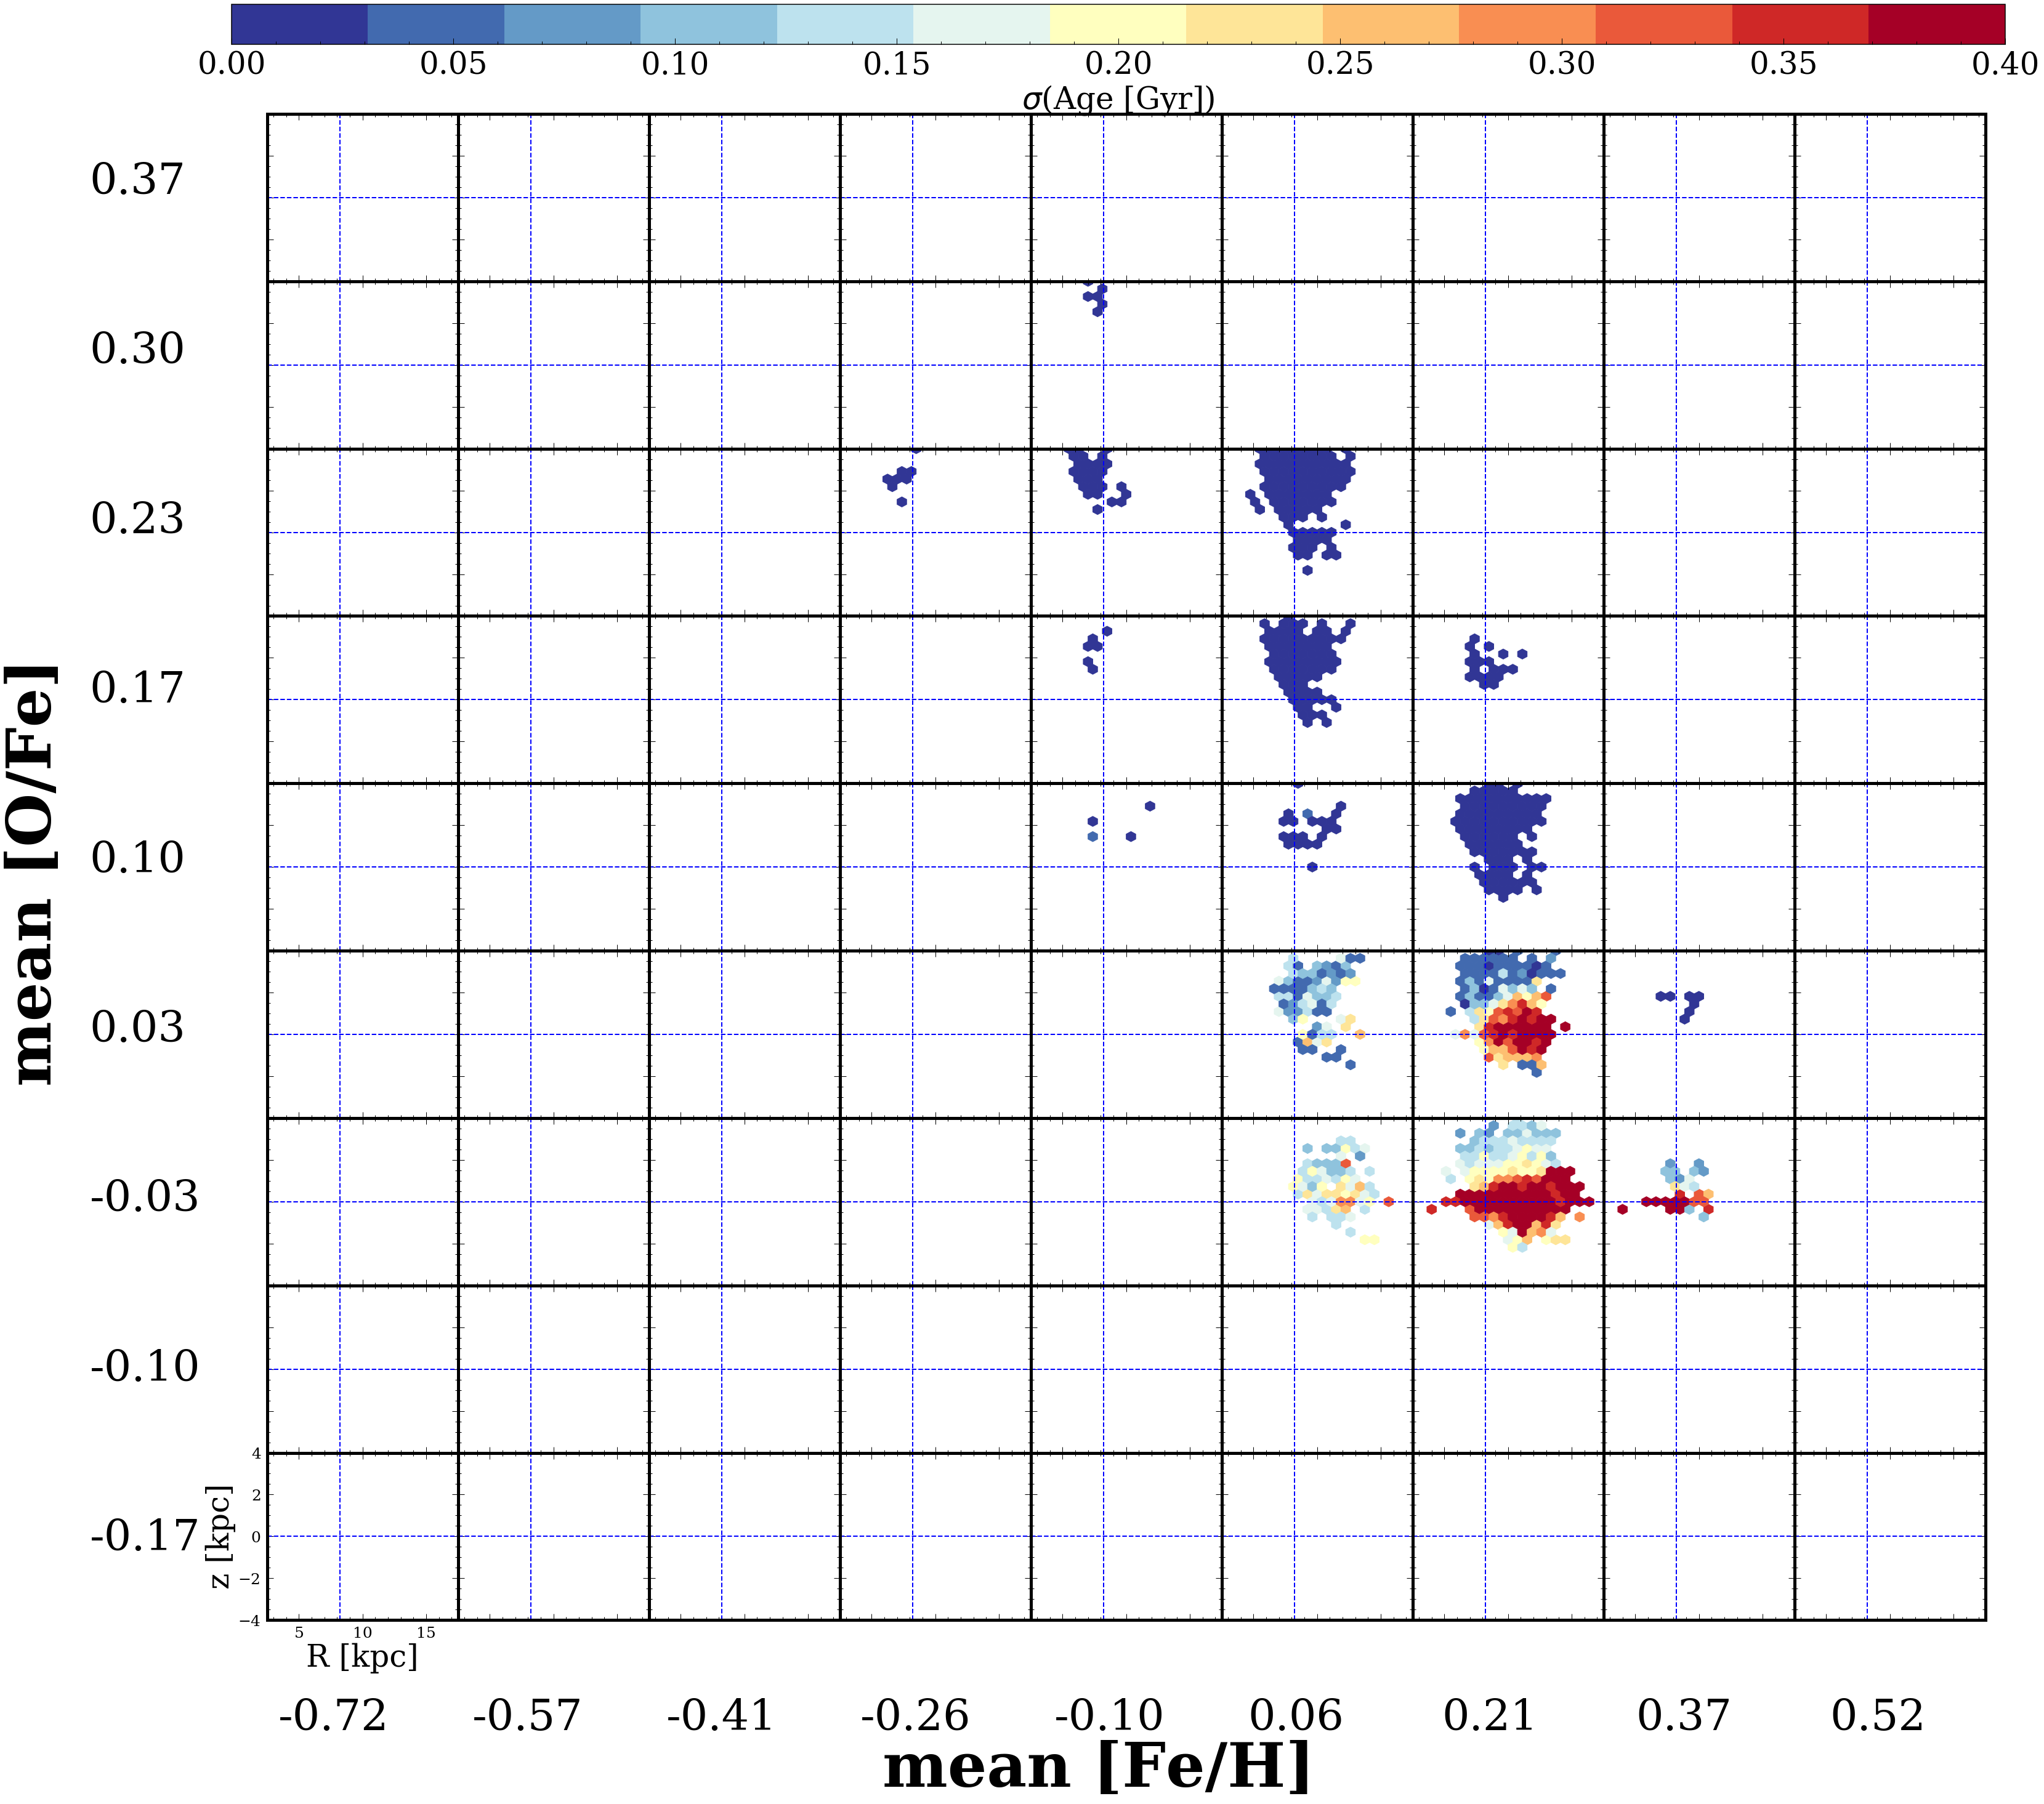

In [457]:
from scipy.ndimage import gaussian_filter

Febin=np.linspace(-0.8,0.6,10)
alpha=np.linspace(0.4,-0.2,10)

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=data.loc[data['ofe_scale']>alpha[i+1]]
    df_all=df_all.loc[df_all['ofe_scale']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_scale'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_scale'])<Febin[j+1]]
        
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].hexbin(df_all_z['R'].values,df_all_z['z'].values,C=np.log10(df_all_z['age'].values),
                             cmap=cmap1,vmin=0,vmax=0.4, gridsize=20,extent=(x1,x2,y1,y2),
                             reduce_C_function = np.std,mincnt=10)
        
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
      
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if i!=len(alpha)-2 or j!=0:
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
        
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        if i==len(alpha)-2 and j==0:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('$\sigma$(Age [Gyr])',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [O/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((max(alpha)-alpha[i]+min(alpha)+max(alpha)-alpha[i+1]+min(alpha))/2), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


plt.savefig('sigmaage_sim_'+simNo+'.png')





100%|██████████| 9/9 [00:00<00:00, 74.18it/s]


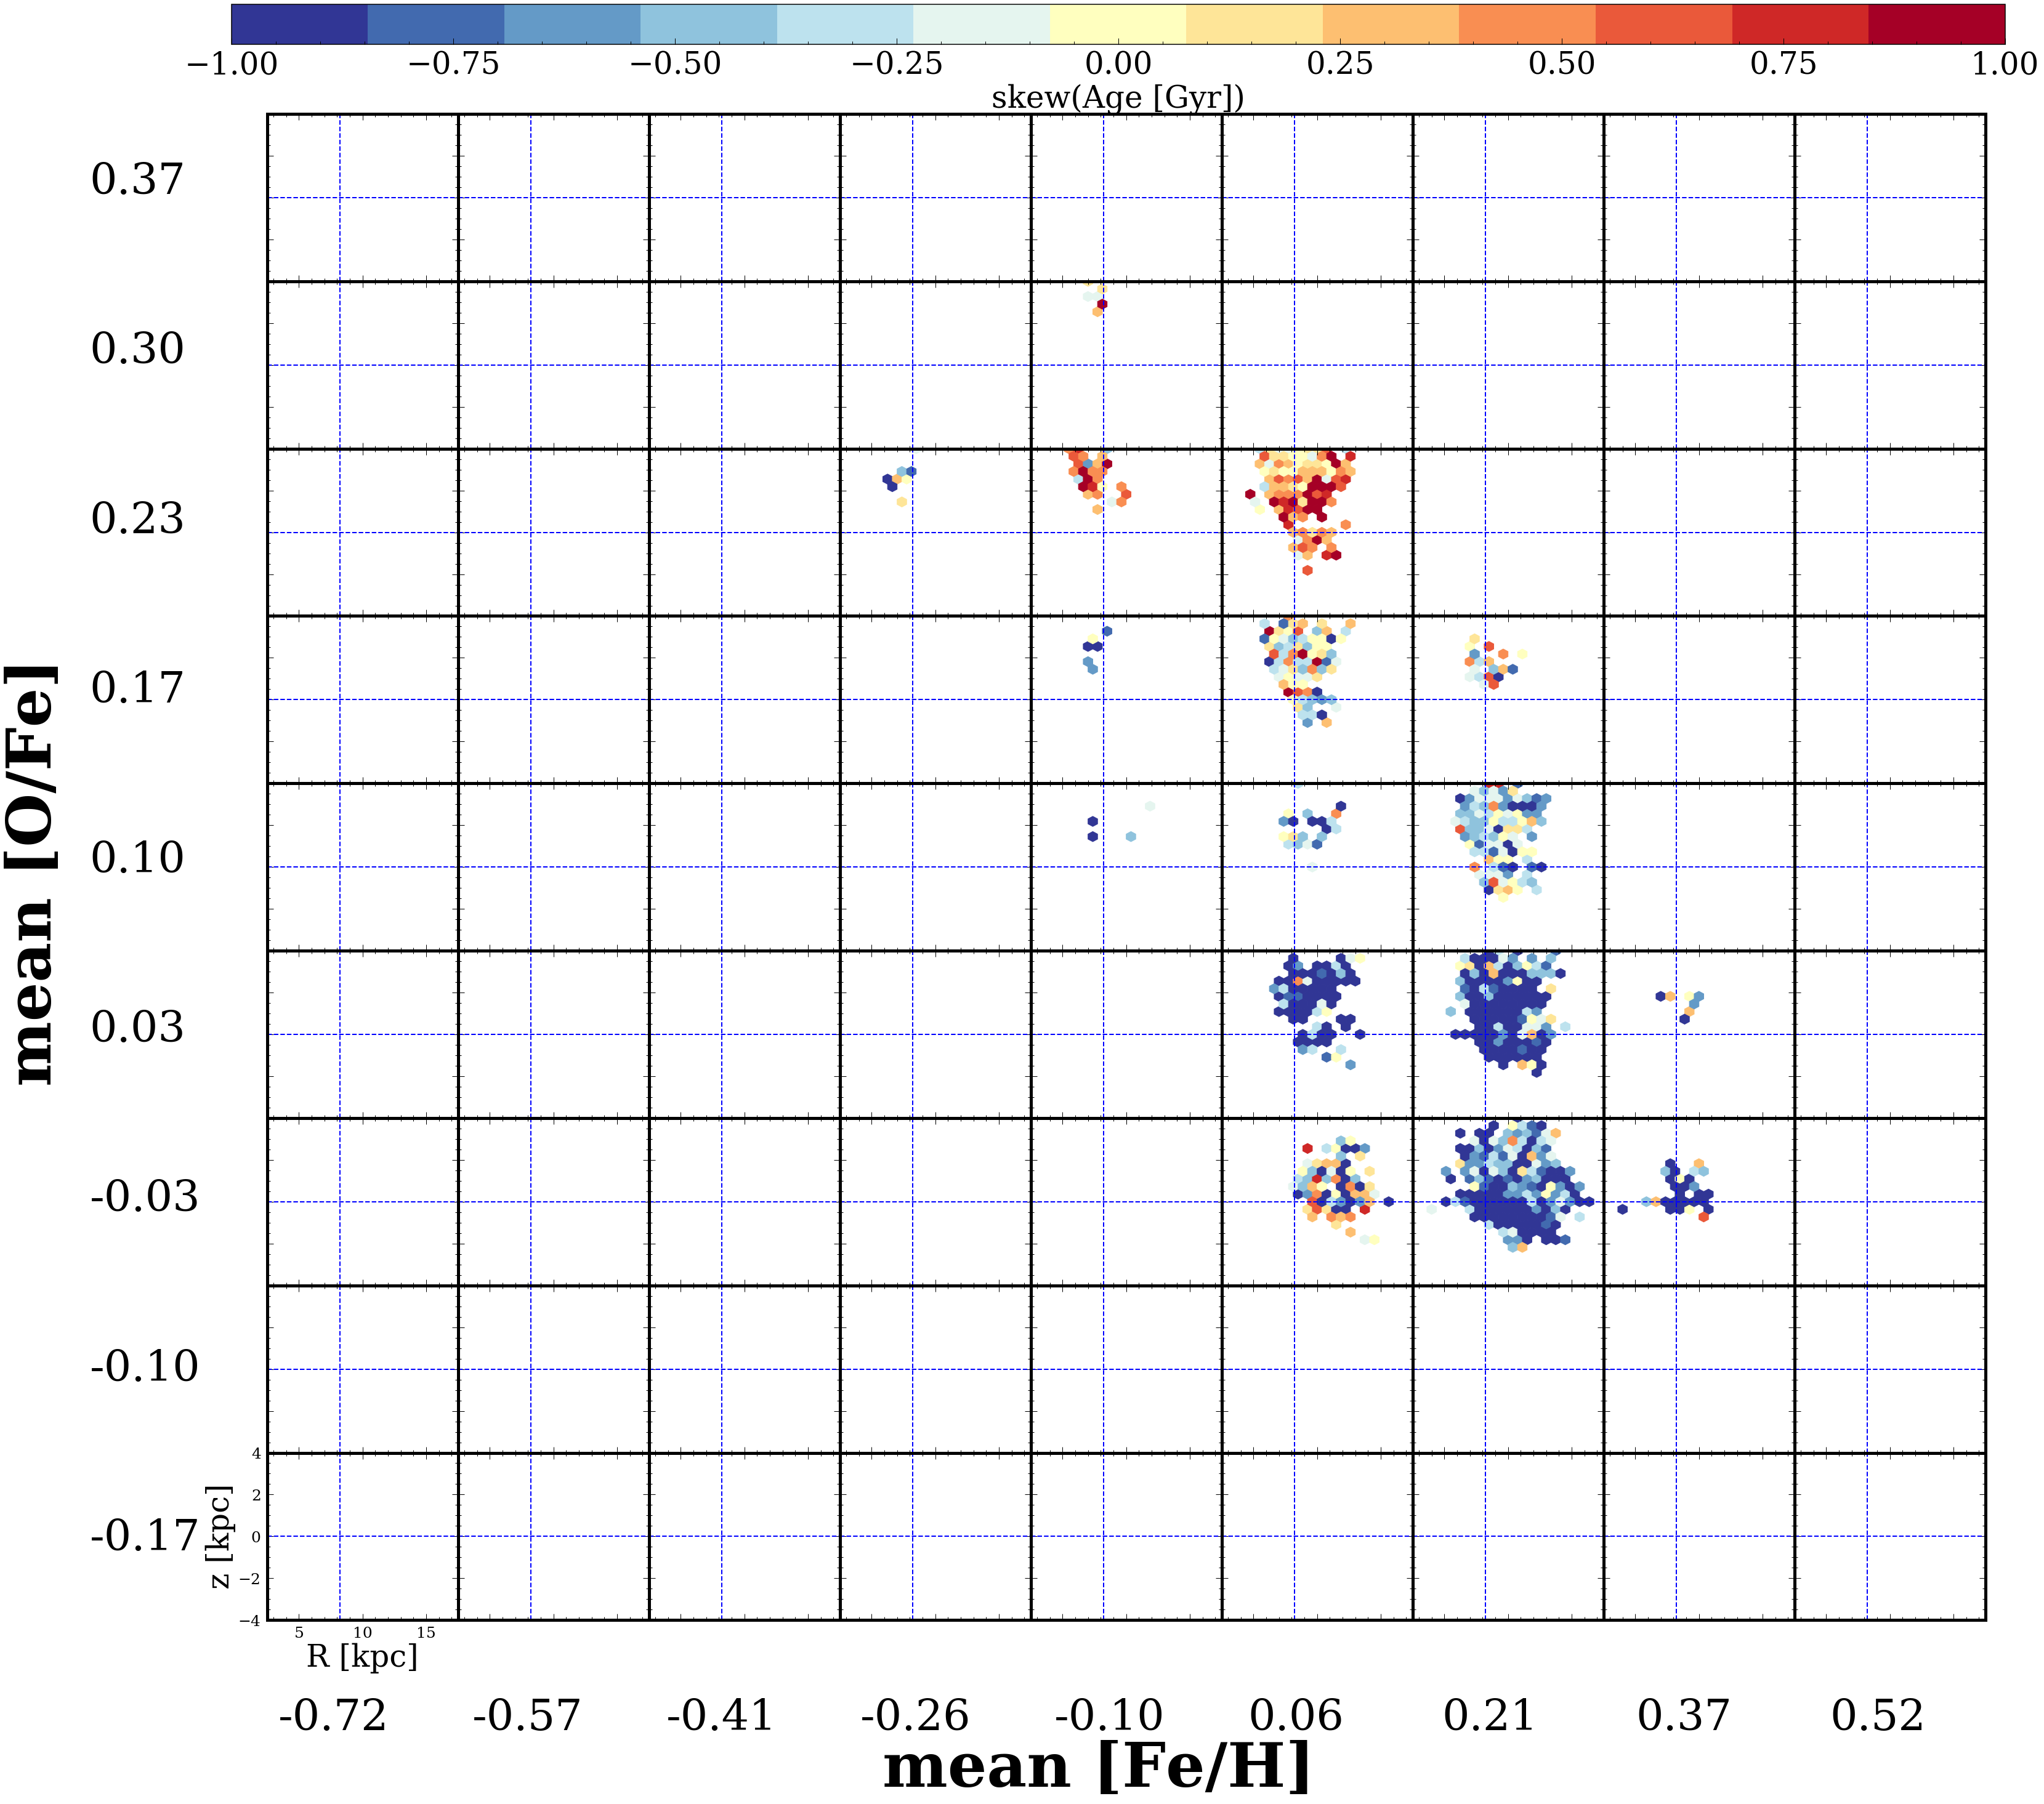

In [458]:
from scipy.ndimage import gaussian_filter
from scipy.stats import skew

Febin=np.linspace(-0.8,0.6,10)
alpha=np.linspace(0.4,-0.2,10)

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=data.loc[data['ofe_scale']>alpha[i+1]]
    df_all=df_all.loc[df_all['ofe_scale']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_scale'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_scale'])<Febin[j+1]]
        
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].hexbin(df_all_z['R'].values,df_all_z['z'].values,C=np.log10(df_all_z['age'].values),
                             cmap=cmap1,vmin=-1,vmax=1, gridsize=20,extent=(x1,x2,y1,y2),
                             reduce_C_function = skew,mincnt=10)
        
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
      
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if i!=len(alpha)-2 or j!=0:
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
        
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        if i==len(alpha)-2 and j==0:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('skew(Age [Gyr])',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [O/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((max(alpha)-alpha[i]+min(alpha)+max(alpha)-alpha[i+1]+min(alpha))/2), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


plt.savefig('skew_sim_'+simNo+'.png')




